In [247]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import re
import datetime
import numpy as np

In [266]:
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [267]:
df = df[~df['Date'].apply(lambda x: bool(re.match('^.*02\-29$',x)))]
df['Date'] = pd.to_datetime(df['Date'])
df_n = df.set_index(['Date','ID']).sort_index()
df_n = df_n.pivot_table(index=['Date','ID'],columns=['Element'],values='Data_Value')
df_n = df_n.droplevel(-1)
df_n['Year'] = df_n.index.year

In [268]:
df_n['Months'] = pd.to_datetime(df_n.index.strftime("%m-%d"),format="%m-%d")
df_m = df_n[df_n['Year'] == 2015]
df_n = df_n[~(df_n['Year'] == 2015)]

In [269]:
df_n = df_n.groupby('Months').agg({'TMAX':'max','TMIN':'min'})
df_m = df_m.groupby('Months').agg({'TMAX':'max','TMIN':'min'})

In [270]:
df_n[['TMAX','TMIN']] = df_n[['TMAX','TMIN']] / 10
df_m[['TMAX','TMIN']] = df_m[['TMAX','TMIN']] / 10

In [271]:
df_m_min = df_m.loc[df_m['TMIN'] < df_n['TMIN'],'TMIN']
df_m_max = df_m.loc[df_m['TMAX'] > df_n['TMAX'],'TMAX']

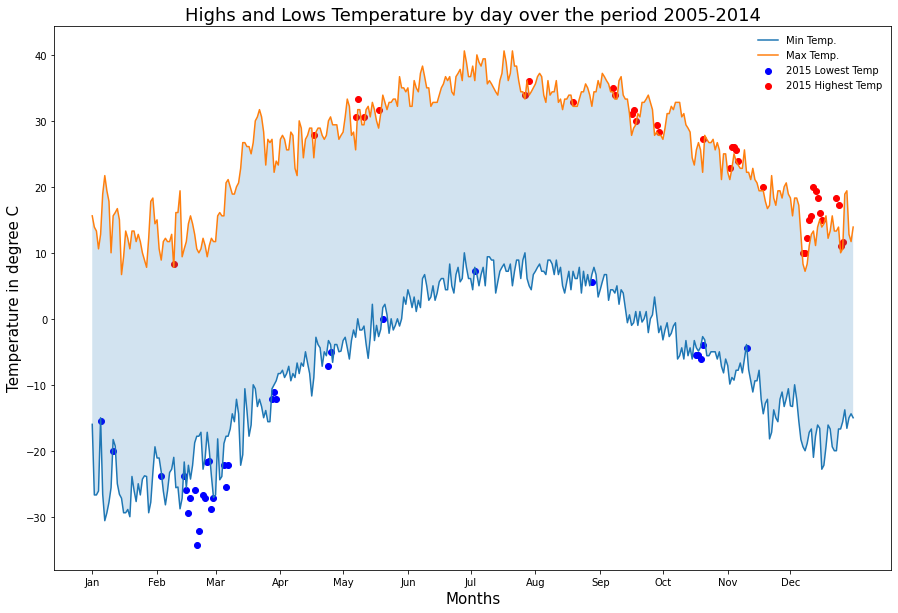

In [290]:
import matplotlib.ticker as plticker
import matplotlib.dates as mdates
plt.figure(figsize=(15,10))
plt.plot(df_n.index,df_n['TMIN'],label='Min Temp.')
plt.plot(df_n.index,df_n['TMAX'],label='Max Temp.')
plt.scatter(df_m_min.index,df_m_min,color='b',label='2015 Lowest Temp')
plt.scatter(df_m_max.index,df_m_max,color='r',label='2015 Highest Temp')
myFmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator() 
plt.legend(frameon=False)
plt.gca().xaxis.set_major_formatter(myFmt)
plt.gca().xaxis.set_major_locator(months)
locs, labels = plt.xticks()
plt.xticks(locs[:-1]) 
plt.fill_between(df_n.index,df_n['TMIN'],df_n['TMAX'],alpha=0.2)
plt.title('Highs and Lows Temperature by day over the period 2005-2014',size=18)
plt.xlabel('Months',size=15)
plt.ylabel('Temperature in degree C',size=15)
plt.show()